In [5]:
from typing import Dict, Tuple
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joypy
import sys

from develop.utils.paths import DATA_ALT, MODEL

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)

In [30]:
from IPython.display import display, HTML

display(HTML('''
<style>
.output_png {
    max-width: 200px !important;
    height: auto !important;
}
</style>
'''))


In [ ]:
cols_interest = ['year', 'ref_year' 'index', 'count', 'count_t-1','entropy', 'cosine_similarity', 'cross_entropy', 'kl_divergence']

fixed = "df_fixed_1920-2020.csv"
chain = "df_chain_1920-2020.csv"

df_fixed = pd.read_csv(os.path.join(DATA_ALT, "04_create_metrics", fixed), sep="|")
df_chain = pd.read_csv(os.path.join(DATA_ALT, "04_create_metrics", chain), sep="|")
df_fixed['ref_type'] = 'fixed_base'
df_chain['ref_type'] = 'chain_base'

def create_top_bottom_stats(
        df_fixed: pd.DataFrame, 
        df_chain: pd.DataFrame
    ) -> Tuple[Dict[str, pd.DataFrame], pd.DataFrame]:
        
        df = pd.concat([df_fixed, df_chain], ignore_index=True)

        metrics = {
            "top1000": {
                "by": ["year", "count"],
                "ascending": [True, False],
                "head": 1000,
            },
            "top50_entropy": {
                "by": ["year", "entropy"],
                "ascending": [True, False],
                "head": 50,
            },
            "bott50_entropy": {
                "by": ["year", "entropy"],
                "ascending": [True, True],
                "head": 50,
            },
            "top50_kl_divergence": {
                "by": ["year", "kl_divergence"],
                "ascending": [True, True],
                "head": 50,
            },
            "top50_cosine_similarity": {
                "by": ["year", "cosine_similarity"],
                "ascending": [True, True],
                "head": 50,
            },
        }

        dfs_dict = {}

        for name, params in metrics.items():
            df_sorted = df.sort_values(by=params["by"], ascending=params["ascending"])
            dfs_dict[name] = df_sorted.groupby("year").head(params["head"])

        return dfs_dict, df

dfs_dict, df = create_top_bottom_stats(df_fixed, df_chain)


In [8]:
df.head()

,index,count,count_t-1,year,ref_year,euclidean_distance,cosine_similarity,cross_entropy,kl_divergence,entropy,entropy_t-1,mean,median,std,iqr,range,word_present_both,fixed_chain
0,new,25314,19851.0,1921,1920,6.499378,0.920569,65.940946,1.124488,64.816458,64.533943,0.508250,0.514053,0.152954,0.173355,0.840166,True,fixed_base
1,today,16924,11878.0,1921,1920,7.239489,0.913828,67.048500,1.128585,65.919914,65.170323,0.515535,0.516587,0.138559,0.205474,0.731769,True,fixed_base
2,yesterday,16662,12618.0,1921,1920,8.801228,0.920027,64.415582,2.174559,62.241022,61.663743,0.518546,0.516444,0.184208,0.251544,0.927227,True,fixed_base
3,say,12984,10863.0,1921,1920,7.126332,0.894981,67.034375,1.286237,65.748138,65.669900,0.502487,0.506105,0.141408,0.146063,0.770756,True,fixed_base
4,state,12696,10885.0,1921,1920,8.815214,0.907616,69.588896,5.867987,63.720909,63.444525,0.488291,0.486666,0.171986,0.303695,0.701454,True,fixed_base


In [38]:

# list of us president from 1920 to 2020
presidents = [
    # "harding",
    "coolidge",
    # "hoover",
    "roosevelt",
    "truman",
    # "eisenhower",
    "kennedy",
    # "johnson",
    "nixon",
    "ford",
    "carter",
    # "reagan",
    "bush",
    "clinton",
    # "obama",
    "trump"
]

cherry_picked = [
    "roosevelt",
    "truman",
    "kennedy",
    "nixon",
    "ford",
    "carter",
    "bush",
    "clinton",
    "trump"
]


## Presidents Graph

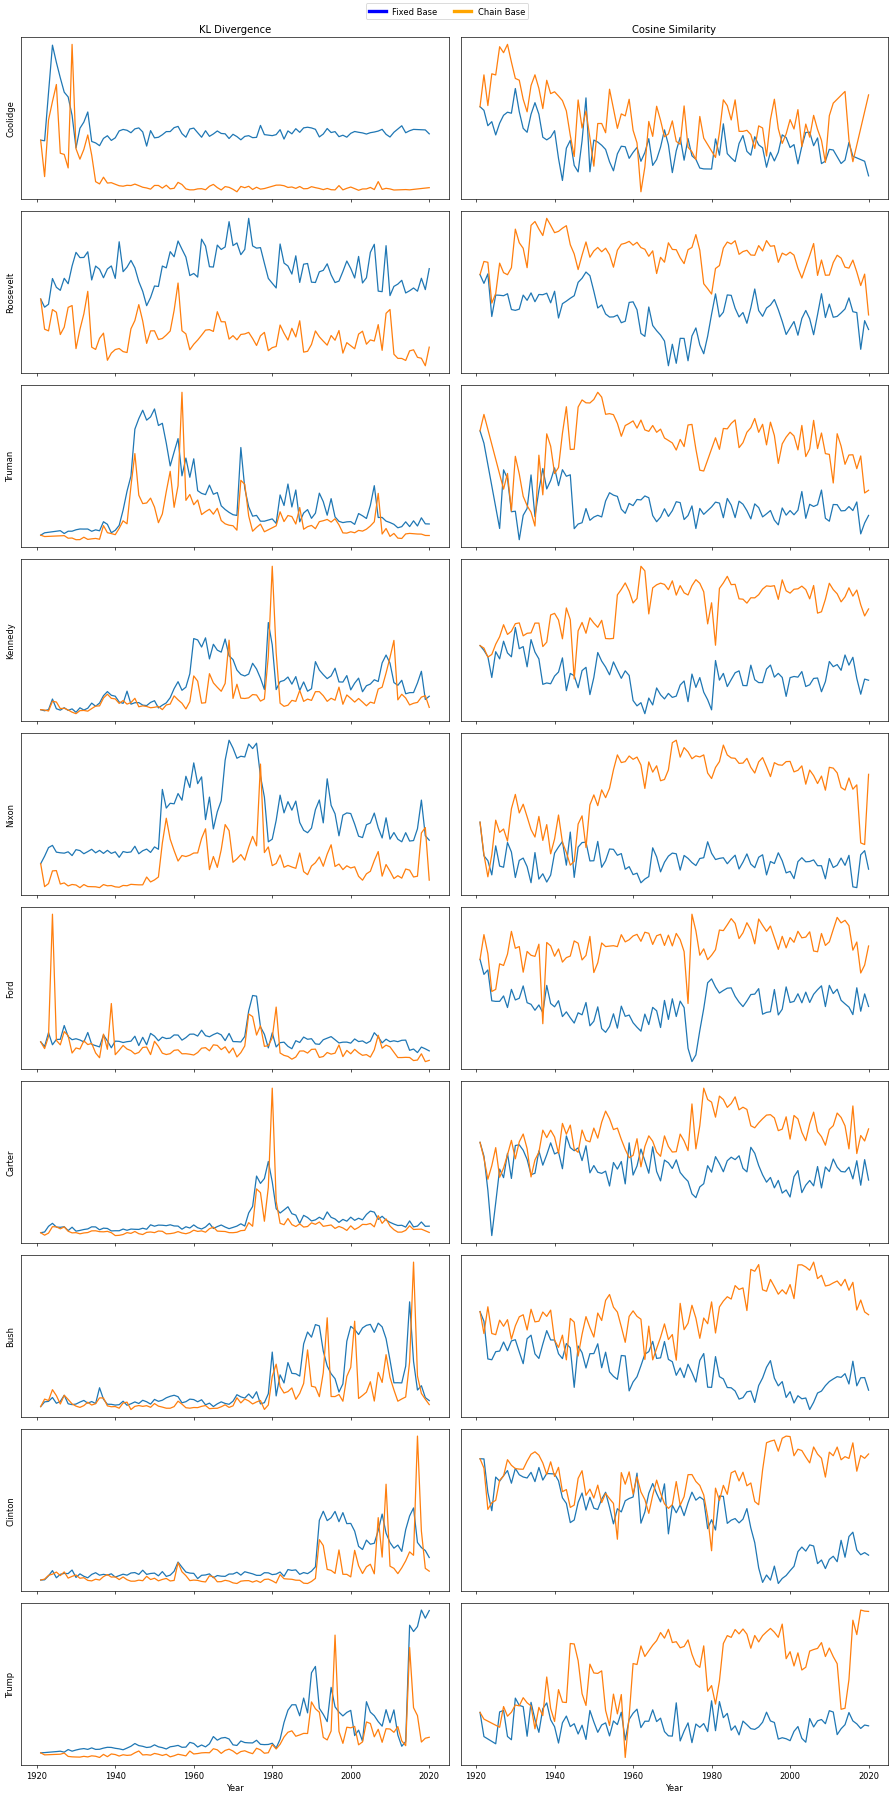

In [ ]:

df_presidents = df[df['index'].str.lower().isin(presidents)]

def plot_word(df, word):
    df_word = df[df['index'] == word]
    fig, ax = plt.subplots(2, 1, figsize=(8, 4))
    sns.lineplot(data=df_word, x='year', y='kl_divergence', hue='ref_type', ax=ax[0])
    sns.lineplot(data=df_word, x='year', y='cosine_similarity', hue='ref_type', ax=ax[1])
    ax[0].set_title(f"KL Divergence for {word}", fontsize=15)
    ax[1].set_title(f"Cosine Similarity for {word}", fontsize=15)
    plt.show()
    
def plot_word_stack(df, words):
    num_words = len(words)
    fig, axes = plt.subplots(num_words, 2, figsize=(15, 3 * num_words), sharex=True, dpi=60) #change this to have an higher quality

    if num_words == 1:
        axes = [axes]

    handles, labels = None, None

    for i, word in enumerate(words):
        df_word = df[df['index'] == word]

        axes[0][0].set_title("KL Divergence")
        sns.lineplot(data=df_word, x='year', y='kl_divergence', hue='ref_type', ax=axes[i][0], legend=False)
        axes[i][0].set_ylabel(f"{word.capitalize()}")
        axes[i][0].set_yticks([])  # Remove y-axis ticks
        axes[i][0].set_yticklabels([])  # Remove y-axis tick labels
        axes[i][0].grid(False)  # Remove grid
        if i == num_words - 1:
            axes[i][0].set_xlabel('Year')

        axes[0][1].set_title("Cosine Similarity")
        sns.lineplot(data=df_word, x='year', y='cosine_similarity', hue='ref_type', ax=axes[i][1], legend=False)
        axes[i][1].set_ylabel('')
        axes[i][1].set_xlabel('')  # Remove the x-axis label for Cosine Similarity plot
        axes[i][1].set_yticks([])  # Remove y-axis ticks
        axes[i][1].set_yticklabels([])  # Remove y-axis tick labels
        axes[i][1].grid(False)  # Remove grid

        if i == num_words - 1:
            axes[i][1].set_xlabel('Year')

    labels = ['Fixed Base', 'Chain Base']
    colors = ['blue', 'orange']
    handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
    fig.legend(
        handles = handles,
        labels=labels,
        loc='upper center',
        ncol=2,
        title_fontsize=15
    )

    plt.tight_layout()
    plt.subplots_adjust(top=.98)  
    plt.show()
    
plot_word_stack(df_presidents, presidents)

In [ ]:

# def boxplot(df, distance_measure, title):
#     plt.figure(figsize=(25,10))
#     sns.boxplot(
#         data=df,
#         x='year',
#         y=distance_measure,
#         hue='fixed_chain',
#         showfliers=False
#         )
#     plt.xticks(rotation=90)
#     # increase the size of the labels
#     plt.tick_params(axis='both', which='major', labelsize=15)
#     plt.xlabel("Year", fontsize=20)
#     plt.ylabel(distance_measure, fontsize=20)
#     plt.title(title, fontsize=20)
#     plt.legend(title="Fixed or Chain", fontsize=15)
#     plt.savefig(os.path.join(DATA_ALT, "05_information_metrics", f"{distance_measure}_by_year.png"))

# boxplot(df_top1000, 'euclidean_distance', title = "Euclidean Distance by year (top 1000 words)")
# boxplot(df_top1000, 'cosine_similarity', title = "Cosine Similarity by year (top 1000 words)")
# boxplot(df_top1000, 'cross_entropy', title = "Cross Entropy by year (top 1000 words)")
# boxplot(df_top1000, 'kl_divergence', title = "KL Divergence by year (top 1000 words)")

# sns.pairplot(df_top1000[[
#     'cosine_similarity', 
#     'cross_entropy', 
#     'kl_divergence', 
#     'entropy', 
#     'mean', 
#     'std', 
#     'iqr', 
# ]], corner=True, plot_kws={"alpha": 0.1})